In [155]:
import json
import requests

# The URL of the API endpoint
url = 'https://api.coincap.io/v2/assets/bitcoin/history?interval=d1'

# Sending a GET request to the URL
response = requests.get(url)

# Checking if the request was successful
if response.status_code == 200:
    # Parsing the JSON response
    r = response.json()
       # Define the filename where you want to store the data
    filename = 'bitcoin.json'
    
    # Write the JSON data to a file
    with open(filename, 'w') as f:
        json.dump(r, f)
    print(filename + ' created')
else:
    print(f"Failed to retrieve data: {response.status_code}")

x = []
y = []
ma = []
ma_2 = []
i = 0
last_3 = []


def calculate_avg(values):
    average = sum(values) / len(values)
    return average

for item in r['data']:
    if(i < 20):
        ma.append(float(item["priceUsd"]))
        last_3.append(float(item["priceUsd"]))
    else: 
        # add average
        del last_3[0] 
        last_3.append(float(item["priceUsd"]))
    
    avg = calculate_avg(last_3)
    ma.append(avg)


    price = float(item["priceUsd"])
    date = item["date"][:10]
    x.append(price) 
    y.append(date) 
    i = i + 1

for item in r['data']:
    if(i < 4):
        ma_2.append(float(item["priceUsd"]))
        last_3.append(float(item["priceUsd"]))
    else: 
        # add average
        del last_3[0] 
        last_3.append(float(item["priceUsd"]))
    
    avg_2 = calculate_avg(last_3)
    ma_2.append(avg_2)





#print(ma)
#print(x)
#print(y)


bitcoin.json created


In [156]:
import matplotlib.pyplot as plt

# Example data: Monthly average temperatures (°C)
#months = ['2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07']
#temperatures = [22436.8049408222792152, 22351.0769388173958120, 22467.7826318359252603, 22432.5623115674822113, 22335.6066766164592654]
ma = ma[:300]
ma_2 = ma_2[:300]
months = y[:300]
temperatures = x[:300]

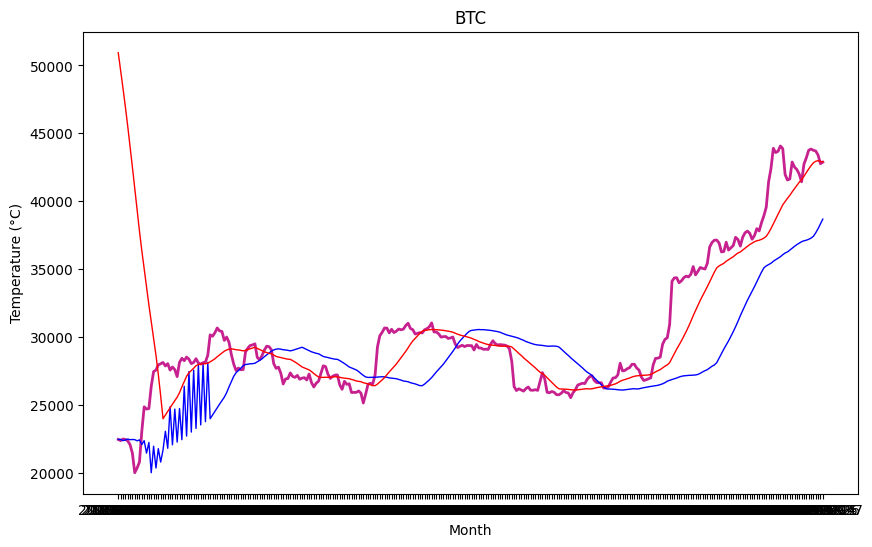

In [157]:


# Creating the plot
plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.plot(months, temperatures, linestyle='-', color='#c7208f',linewidth=2)
plt.plot(months, ma, linestyle='-', color='b',linewidth=1)
plt.plot(months, ma_2, linestyle='-', color='r',linewidth=1)


# Adding title and labels
plt.title('BTC')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Optional: Adding a grid
#plt.grid(True)

# Display the plot
plt.show()
